In [8]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install factor_analyzer

%reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
# Load data
recipes = pd.read_json("recipes.json").T

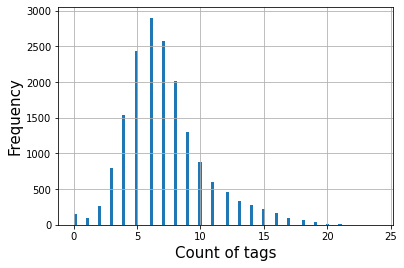

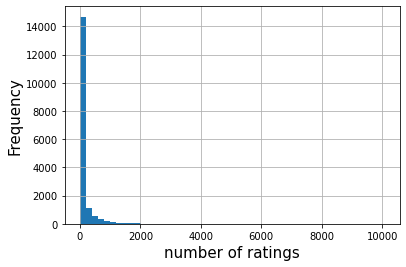

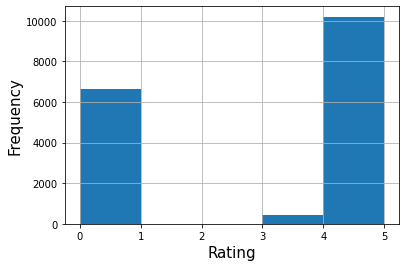

In [10]:
# Calculate Count of tags
recipes['len'] = recipes['tags'].str.len()

# create histogram of len
recipes['len'].hist(bins=100)
plt.xlabel("Count of tags", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

# create histogram of num_ratings
recipes['num_ratings'].hist(bins=50)
plt.xlabel("number of ratings", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

# create histogram of avg_raging
recipes['avg_rating'].hist(bins=5)
plt.xlabel("Rating", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()


# Testing Dimensionality Reduction Techniques
https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [11]:
#Loading data using Austen's code
import json

# Load the data
with open("recipes.json", "r") as file:
    recipes = file.read()
with open("ingredients.json", "r") as file:
    ingredients = file.read()
with open("tags.json", "r") as file:
    tags = file.read()

recipes = json.loads(recipes)
ingredients = json.loads(ingredients)
tags = json.loads(tags)

print("number of recipes: " + str(len(recipes)))

# Create a mapping to make the one hot encoding of ingredients with
ingredients_indices = {}
index = 0
for ingredient in ingredients.items():
    ingredients_indices[ingredient[0]] = index
    index += 1

# Calculate the dimension of the training and testing data
num_samples = len(recipes)
num_features = len(ingredients)

samples = np.zeros((num_samples, num_features))

# Create the training and testing data
sample_index = 0
for recipe in recipes.items():
    tag_index = 0
    for ingredient in recipe[1]["ingredients"]:
        samples[sample_index][ingredients_indices[str(ingredient["id"])]] = 1.0
    sample_index += 1

number of recipes: 17268


In [12]:
#Use factor analysis to reduce to 50 dimensions
print(len(samples))
print(samples.shape)

transformer = FactorAnalysis(n_components=50, random_state=0)
transformed_samples = transformer.fit_transform(samples)

print(transformed_samples.shape)

17268
(17268, 2419)
(17268, 50)


(17268, 2)


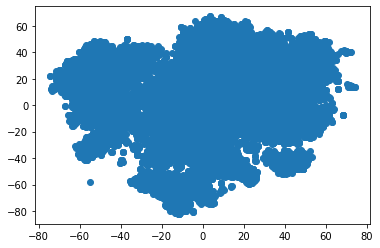

In [13]:
#Use t-sne to reduce to 2 dimensions
final_samples = TSNE(n_components=2).fit_transform(transformed_samples)
print(final_samples.shape)

plt.scatter(final_samples[:,0], final_samples[:,1])
plt.show()


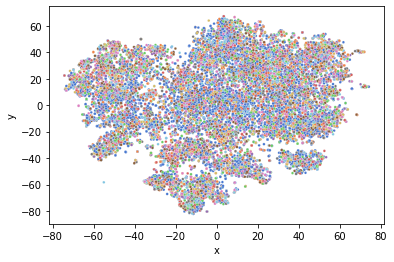

In [19]:
# Add column containing labels
labels = np.zeros((len(recipes), 1))
sample_index = 0
for recipe in recipes.items():
    labels[sample_index][0] = recipe[1]['num_ratings']
    sample_index += 1

final_with_label = np.append(final_samples, labels, 1)
df_final_with_label = pd.DataFrame(final_with_label, columns=['x','y','label'])

ax = sn.scatterplot(x='x', y='y', data=df_final_with_label, hue='label', palette='muted', s=7, legend=None)
plt.show()


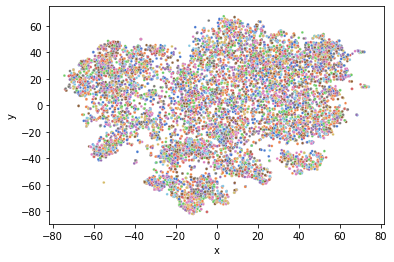

In [21]:
#remove recipes with 0 ratings
df_final_with_label_no_zeros = df_final_with_label[df_final_with_label.label != 0]

ax = sn.scatterplot(x='x', y='y', data=df_final_with_label_no_zeros, hue='label', palette='muted', s=7, legend=None)
plt.show()
